In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel('iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

array([[<Axes: title={'center': 'SL'}>, <Axes: title={'center': 'SW'}>],
       [<Axes: title={'center': 'PL'}>, <Axes: title={'center': 'PW'}>]],
      dtype=object)

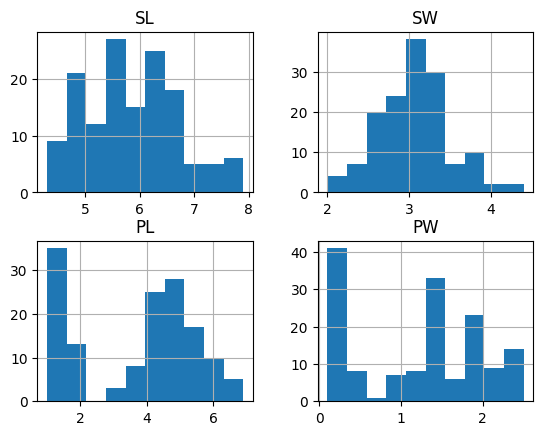

In [ ]:
data.hist()

In [ ]:
for i in ["SL","SW","PL"]:
    data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data["Classification"]=label_encoder.fit_transform(data["Classification"])

In [ ]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [ ]:
X=data.drop(["Classification"],axis=1)
y=data["Classification"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy is ",accuracy_score(y_test,y_pred))

Accuracy is  1.0


In [ ]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

**SVM**

In [ ]:
from sklearn.svm import SVC
svmcls=SVC(kernel="rbf")
svmcls.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=svmcls.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy is ",accuracy_score(y_test,y_pred))

Accuracy is  1.0


In [ ]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)

In [ ]:
print("Accuracy is ",accuracy_score(y_test,y_pred))

Accuracy is  1.0


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf_clf.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
print("Accuracy is ",accuracy_score(y_test,y_pred))

Accuracy is  1.0


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [ ]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

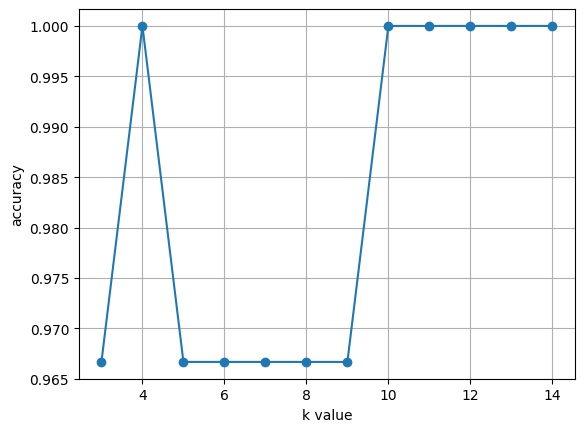

In [ ]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.grid()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=4,metric="minkowski",p=2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
print("Accuracy is ",accuracy_score(y_test,y_pred))

Accuracy is  1.0
